In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
import pandas as pd
df=pd.read_csv("/Users/divyaj_podar/final_set.csv")
df.head()
#df[df['Brand']=='samsung']
df.info()

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
0,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Unbox Therapy,Your favorite smartphone right now... Galaxy S...,5783.0
1,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Neil.is.FAMOUS,I caved today and got an s10 plus for my tiny ...,0.0
2,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Carter Mickens,Samsung: Give them more to do and see\nApple: ...,0.0
3,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Crookie 2k,Yes it is the phone,0.0
4,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Tim Hex,Have u guys bought this phone I just wanna kno...,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109304 entries, 0 to 109303
Data columns (total 11 columns):
Channel Name      109304 non-null object
Brand             109304 non-null object
Model             109299 non-null object
URL               109299 non-null object
Published_date    109299 non-null object
Views             109299 non-null object
Likes             109299 non-null float64
Dislikes          109299 non-null float64
user              109297 non-null object
commentText       109299 non-null object
likes             109294 non-null float64
dtypes: float64(3), object(8)
memory usage: 9.2+ MB


In [3]:
df.isnull().sum(axis=0)
df=df.dropna(how='any')    # Removing null
df.isnull().sum(axis=0)

Channel Name       0
Brand              0
Model              5
URL                5
Published_date     5
Views              5
Likes              5
Dislikes           5
user               7
commentText        5
likes             10
dtype: int64

Channel Name      0
Brand             0
Model             0
URL               0
Published_date    0
Views             0
Likes             0
Dislikes          0
user              0
commentText       0
likes             0
dtype: int64

In [4]:
print(df.shape)    # shape of dataframe after dropping the nulls

(109292, 11)


In [5]:
df=df.drop_duplicates(keep="first")

In [6]:
print(df.shape)

(109039, 11)


In [7]:
df_sort=df.sort_values(by='likes',ascending=False)
df_sort.head() # latest 2000 comments

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
52479,Marques_Brownlee,oneplus,6t,https://www.youtube.com/watch?v=_6-XjSvbJsE,29 Oct 2018,"6,147,012",131000.0,3400.0,CaseyNeistat,even at $1k it would be one of the best androi...,10106.0
35493,Unbox_Therapy,apple,xs,https://www.youtube.com/watch?v=XFckmtISfJk&t=2s,22 Sep 2018,"4,838,265",156000.0,6100.0,Unbox Therapy,So what do you think... Should I switch to the...,8648.0
23921,Unbox_Therapy,oneplus,6t,https://www.youtube.com/watch?v=KI6ZJTSja4s&t=2s,1 Nov 2018,"7,123,013",85000.0,3200.0,Unbox Therapy,Should I switch to this next? Something else?,8251.0
23602,Unbox_Therapy,google,pixel3,https://www.youtube.com/watch?v=BJrsmM6aEYE,9 Oct 2018,"3,264,839",85000.0,10000.0,Unbox Therapy,Is this my next smartphone switch?,7368.0
90108,Marques_Brownlee,samsung,s10,https://www.youtube.com/watch?v=t9R7xx0joOU&t=...,20 Feb 2019,"8,822,405",209000.0,6400.0,Taikamuna,It has a headphone jack. Already better than a...,7130.0


In [8]:
#Top commentors by comments
count=df.groupby(['user'])['user'].count()              #value count of each user
count=count.to_frame(name='count')
count.sort_values('count',ascending=False).head()

,count
user,
Alex,31
Varun Shewraj,23
John Smith,21
Shubham Bhatt,20
Paras Vaghasia,20


In [9]:
# Top commentors by liked comments
top_comments=df.groupby(['user'])['likes'].sum()   #value count of each user
top_comments=top_comments.to_frame(name='count')
top_comments.sort_values('count',ascending=False).head()

,count
user,
Unbox Therapy,31712.0
CaseyNeistat,10106.0
Taikamuna,10031.0
Mrwhosetheboss,4631.0
Abdul Aaqib Mohammed,4183.0


In [10]:
df_6t=df[df['Model']=='6t']
df_s10=df[df['Model']=='s10']
df_pixel3=df[df['Model']=='pixel3']
df_xs=df[df['Model']=='xs']

print("Shape of Oneplus 6t Dataframe: ",df_6t.shape)
print("Shape of Samsung s10 Dataframe: ",df_s10.shape)
print("Shape of iphone xs Dataframe: ",df_xs.shape)
print("Shape of Pixel 3 Dataframe: ",df_pixel3.shape)

Shape of Oneplus 6t Dataframe:  (25342, 11)
Shape of Samsung s10 Dataframe:  (28936, 11)
Shape of iphone xs Dataframe:  (24190, 11)
Shape of Pixel 3 Dataframe:  (30571, 11)


In [11]:
#Likes Dislikes on each Channel Videos
df.groupby('Model')["Dislikes","Likes"].sum()\
.plot(kind='bar', figsize=(10,5))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
52479,Marques_Brownlee,oneplus,6t,https://www.youtube.com/watch?v=_6-XjSvbJsE,29 Oct 2018,"6,147,012",131000.0,3400.0,CaseyNeistat,even at $1k it would be one of the best androi...,10106.0
23921,Unbox_Therapy,oneplus,6t,https://www.youtube.com/watch?v=KI6ZJTSja4s&t=2s,1 Nov 2018,"7,123,013",85000.0,3200.0,Unbox Therapy,Should I switch to this next? Something else?,8251.0
56409,Marques_Brownlee,oneplus,6t,https://www.youtube.com/watch?v=_6-XjSvbJsE,29 Oct 2018,"6,147,012",131000.0,3400.0,Mic Rose,I'm not a fan of the notch but this is easily ...,2662.0
54520,Marques_Brownlee,oneplus,6t,https://www.youtube.com/watch?v=_6-XjSvbJsE,29 Oct 2018,"6,147,012",131000.0,3400.0,Unclejerry50th,Google just needs to slap the pixel logo and c...,2366.0
24849,Unbox_Therapy,oneplus,6t,https://www.youtube.com/watch?v=KI6ZJTSja4s&t=2s,1 Nov 2018,"7,123,013",85000.0,3200.0,Bigdrop,Watching on my oneplus 6t :D \n\n\n\nSwitched ...,1426.0


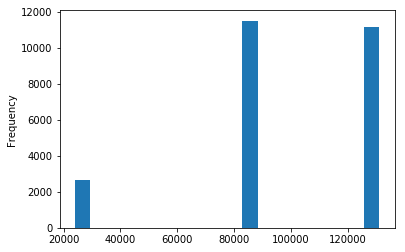

user
Steven Corbo                14
Shibin Babu                  8
Amit Trivedi                 7
ROBLOX Royale High Lover     7
Bigdrop                      6
Name: user, dtype: int64

user
CaseyNeistat       10106.0
Unbox Therapy       8251.0
Mic Rose            2662.0
Unclejerry50th      2366.0
Crimson Arzuros     1722.0
Name: likes, dtype: float64

user
CaseyNeistat         10106.0
Unbox Therapy         8251.0
Mic Rose              2662.0
Jonathan Morrison     1413.0
Unclejerry50th        1183.0
Name: likes, dtype: float64

In [17]:
#-----------------------------------------------------Oneplus 6t---------------------------------------------------------
df_6t_sort=df_6t.sort_values(by='likes',ascending=False)
df_6t_sort.head(5)

df_6t['Likes'].plot(kind='hist',bins=20)
plt.show()
# Top commentors by comments
count=df_6t.groupby(['user'])['user'].count()   #value count of each user
count.nlargest(5)

# Top commentors by liked comments
top_comments=df_6t.groupby(['user'])['likes'].sum()   #value count of each user
top_comments.nlargest(5)

#top commentors with average likes per comment 
top_likes_per_comment=df_6t.groupby(['user'])['likes'].mean()  #value count of each user
top_likes_per_comment.nlargest(5)

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
90108,Marques_Brownlee,samsung,s10,https://www.youtube.com/watch?v=t9R7xx0joOU&t=...,20 Feb 2019,"8,822,405",209000.0,6400.0,Taikamuna,It has a headphone jack. Already better than a...,7130.0
0,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Unbox Therapy,Your favorite smartphone right now... Galaxy S...,5783.0
81060,Marques_Brownlee,samsung,s10,https://www.youtube.com/watch?v=t9R7xx0joOU&t=...,20 Feb 2019,"8,822,405",209000.0,6400.0,electronicsNmore,The obsession over smartphones has reached an ...,2792.0
84570,Marques_Brownlee,samsung,s10,https://www.youtube.com/watch?v=t9R7xx0joOU&t=...,20 Feb 2019,"8,822,405",209000.0,6400.0,I suck at Gaming,When your phone have more Ram than your comput...,2767.0
4122,Unbox_Therapy,samsung,s10,https://www.youtube.com/watch?v=7YKjLzlc-hY&t=3s,21 Feb 2019,"4,421,639",104000.0,3800.0,Bans Gandhi,Apple is just a brand .... Samsung makes new t...,2424.0


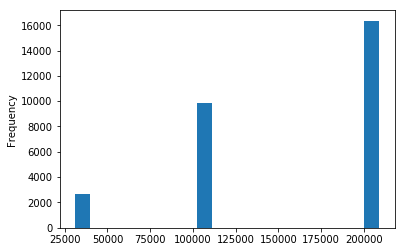

user
Alex            12
Justin Y.       11
Rodney Davis     9
John Smith       8
satnam singh     8
Name: user, dtype: int64

user
Taikamuna           9315.0
Unbox Therapy       5783.0
electronicsNmore    2792.0
I suck at Gaming    2767.0
Bans Gandhi         2424.0
Name: likes, dtype: float64

user
Unbox Therapy       5783.0
Taikamuna           4657.5
electronicsNmore    2792.0
I suck at Gaming    2767.0
Nightcore Lab       2254.0
Name: likes, dtype: float64

In [18]:
#-----------------------------------------------------Samsung s 10---------------------------------------------------------
df_s10_sort=df_s10.sort_values(by='likes',ascending=False)
df_s10_sort.head(5)
df_s10['Likes'].plot(kind='hist',bins=20)
plt.show()
# Top commentors by comments
count=df_s10.groupby(['user'])['user'].count()   #value count of each user
count.nlargest(5)

# Top commentors by liked comments
top_comments=df_s10.groupby(['user'])['likes'].sum()   #value count of each user
top_comments.nlargest(5)

#top commentors with average likes per comment 
top_likes_per_comment=df_s10.groupby(['user'])['likes'].mean()  #value count of each user
top_likes_per_comment.nlargest(5)

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
23602,Unbox_Therapy,google,pixel3,https://www.youtube.com/watch?v=BJrsmM6aEYE,9 Oct 2018,"3,264,839",85000.0,10000.0,Unbox Therapy,Is this my next smartphone switch?,7368.0
66880,Marques_Brownlee,google,pixel3,https://www.youtube.com/watch?v=LRh_iVXulXk,9 Oct 2018,"4,442,663",112000.0,3700.0,Abdul Aaqib Mohammed,1. No headphone jack\n2. Notch bigger than the...,4183.0
20381,Unbox_Therapy,google,pixel3,https://www.youtube.com/watch?v=BJrsmM6aEYE,9 Oct 2018,"3,264,839",85000.0,10000.0,Cryomancer,So let me get this straight... And with high r...,2671.0
71080,Marques_Brownlee,google,pixel3,https://www.youtube.com/watch?v=LRh_iVXulXk,9 Oct 2018,"4,442,663",112000.0,3700.0,Aditya Bhandari 卐,Why didn't they add the headphone jack? That n...,2267.0
9904,Unbox_Therapy,google,pixel3,https://www.youtube.com/watch?v=BJrsmM6aEYE,9 Oct 2018,"3,264,839",85000.0,10000.0,Unbox Therapy,"Guys I don't like the notch, I'll be disabling...",1662.0


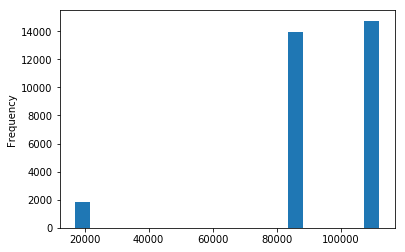

user
Paras Vaghasia    20
Mark Sheldon      12
Arin Berin        11
Shubham Bhatt     11
John Smith         9
Name: user, dtype: int64

user
Unbox Therapy           9030.0
Abdul Aaqib Mohammed    4183.0
Cryomancer              2671.0
Aditya Bhandari 卐       2267.0
Shubham Bhatt           2011.0
Name: likes, dtype: float64

user
Unbox Therapy           4515.0
Abdul Aaqib Mohammed    4183.0
Cryomancer              2671.0
Aditya Bhandari 卐       2267.0
Caligula                1561.0
Name: likes, dtype: float64

In [19]:
#-----------------------------------------------------Pixel 3---------------------------------------------------------
df_pixel3_sort=df_pixel3.sort_values(by='likes',ascending=False)
df_pixel3_sort.head(5)
df_pixel3['Likes'].plot(kind='hist',bins=20)
plt.show()
# Top commentors by comments
count=df_pixel3.groupby(['user'])['user'].count()   #value count of each user
count.nlargest(5)

# Top commentors by liked comments
top_comments=df_pixel3.groupby(['user'])['likes'].sum()   #value count of each user
top_comments.nlargest(5)

#top commentors with average likes per comment 
top_likes_per_comment=df_pixel3.groupby(['user'])['likes'].mean()  #value count of each user
top_likes_per_comment.nlargest(5)

,Channel Name,Brand,Model,URL,Published_date,Views,Likes,Dislikes,user,commentText,likes
35493,Unbox_Therapy,apple,xs,https://www.youtube.com/watch?v=XFckmtISfJk&t=2s,22 Sep 2018,"4,838,265",156000.0,6100.0,Unbox Therapy,So what do you think... Should I switch to the...,8648.0
99159,Marques_Brownlee,apple,xs,https://www.youtube.com/watch?v=YAF9BWpzwvI,18 Sep 2018,"4,397,989",100000.0,4500.0,Mrwhosetheboss,2019: iPhone XS Max Mini,4631.0
45265,Unbox_Therapy,apple,xs,https://www.youtube.com/watch?v=XFckmtISfJk&t=2s,22 Sep 2018,"4,838,265",156000.0,6100.0,Open Season,Apple is not proud of that notch if they are h...,2744.0
97213,Marques_Brownlee,apple,xs,https://www.youtube.com/watch?v=YAF9BWpzwvI,18 Sep 2018,"4,397,989",100000.0,4500.0,Zishan,"Seriously guys, we need to stop the trend of 1...",1991.0
96427,Marques_Brownlee,apple,xs,https://www.youtube.com/watch?v=YAF9BWpzwvI,18 Sep 2018,"4,397,989",100000.0,4500.0,Pawan Mahajan,New iphone names are like Sizes of UNDERWEAR 🤡,1764.0


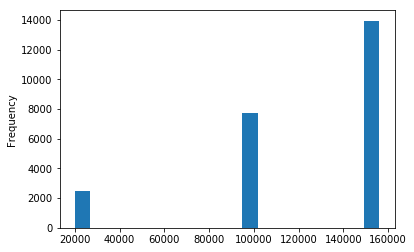

user
Varun Shewraj     23
Lamur Cribb       10
Moises Sequera     9
Shubham Bhatt      9
jamal laamim       9
Name: user, dtype: int64

user
Unbox Therapy     8648.0
Mrwhosetheboss    4631.0
Open Season       3026.0
Zishan            2022.0
Pawan Mahajan     1764.0
Name: likes, dtype: float64

user
Unbox Therapy        8648.0
Mrwhosetheboss       4631.0
Pawan Mahajan        1764.0
Cookie Tasty         1654.0
Molly's Lovechild    1541.0
Name: likes, dtype: float64

In [20]:
#-----------------------------------------------------Iphone xs---------------------------------------------------------
df_xs_sort=df_xs.sort_values(by='likes',ascending=False)
df_xs_sort.head(5)
df_xs['Likes'].plot(kind='hist',bins=20)
plt.show()
# Top commentors by comments
count=df_xs.groupby(['user'])['user'].count()   #value count of each user
count.nlargest(5)

# Top commentors by liked comments
top_comments=df_xs.groupby(['user'])['likes'].sum()   #value count of each user

top_comments.nlargest(5)

#top commentors with average likes per comment 
top_likes_per_comment=df_xs.groupby(['user'])['likes'].mean()  #value count of each user
top_likes_per_comment.nlargest(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


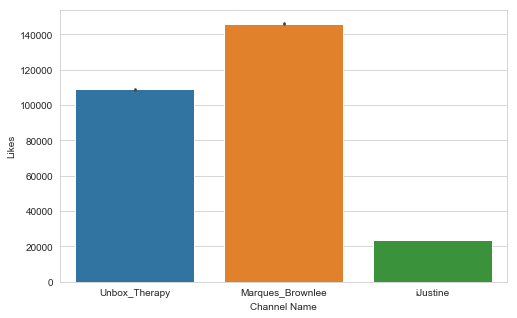

In [21]:
import seaborn as sns
sns.set_style("whitegrid");

plt.figure(figsize=(8,5));
sns.barplot(x='Channel Name',y='Likes', data=df);
plt.show(); 

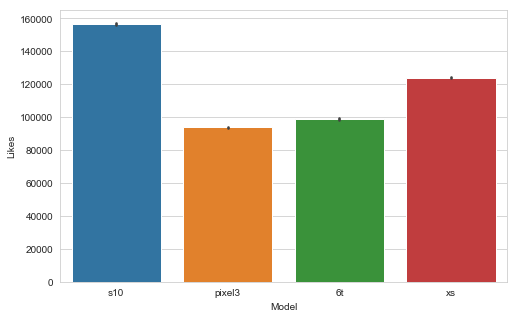

In [22]:
import seaborn as sns
sns.set_style("whitegrid");

plt.figure(figsize=(8,5));
sns.barplot(x='Model',y='Likes', data=df);
plt.show(); 